* 분산분석 : 범주형 독립변수의 집단에 따라 연속형 종속변수의 평균에 차이가 있는지 통계학적으로 검정하는 방법
           : t-test의 확장으로 독립변수의 집단이 3개 이상일 경우 사용하는 F검정
           : 반응변수의 총 변동(TSS)을 각 그룹 간 차이에 의한 변동(SST)과 그룹 간 차이 외 변동(SSE)로 분해하고
             이때 SST가 SSE보다 클 수록 각 그룹간 평균차가 통계학적으로 유의미하다.
            
* 분산 분석 표

- 요인  자유도  제곱합     평균제곱      F-value
- 처리    k-1    SST    MST=SST/자유도   F=MST/MSE
- 오차    n-k    SSE    MSE=SSE/자유도
- 총      n-1    TSS 


1. 일원 분산 분석     - 독립변수 : 1개(범주형)              종속변수 : 1개(연속형)
2. 이원 분산 분석     - 독립변수 : 2개(범주형)              종속변수 : 1개(연속형)
3. 다원 분산 분석     - 독립변수 : 3개 이상(범주형)         종속변수 : 1개(연속형)
4. 다변량 분산 분석   - 독립변수 : 1개 이상(범주형)         종속변수 : 2개 이상(연속형)
5. 공분산 분석        - 독립변수 : 2개 이상(연속형/범주형)  종속변수 : 1개(연속형)
6. 다변량 공분산 분석 - 독립변수 : 2개 이상(연속형/범주형)  종속변수 : 2개 이상(연속형)

1. 일원 분산 분석
- 오차와 처리의 분산비를 이용해 처리 효과가 유의한지 검정
- 각 수준 중 적어도 하나는 효과가 있는가를 검정
- 따라서 검정 결과가 유의한 경우 각 수준 간 유의차가 존재하는 쌍을 찾는 다중비교 절차 필요

- 종속변수에 있어서 독립변수에 의해 설명되지 않는 영역 즉, 오차에 대한 가정
     - 독립성 : 각각의 오차는 독립
     - 등분산성 : 등분산 가정
     - 정규성 : 정규분포 가정


* 왜도 : 분포의 비대칭을 나타내는 통계량(좌우로 치우진 정도)
    - 왜도의 가운데는 중앙값
    - 왜도 < 0 : 오른쪽 치우침 / 왜도 = 0 : 정규분포 / 왜도 > 0 : 왼쪽으로 치우침
    - scipy 패키지의 stats 클래스에서 stats.sker() 메소드 사용

* 첨도 : 자료가 중앙에 얼마나 분포되어 있는지를 나타내는 통계량(뾰족한 정도)
    - 첨도 < 0 : 정규분포보다 납작함 / 첨도 = 0 : 정규분포 / 첨도 > 0 : 정규분포보다 뾰족함
    - scipy 패키지의 stats 클래스에서 stats.kurtosis() 메소드 사용


In [141]:
# 공급업체 도입을 위해 4개 업체를 선정했다. 실험적으로 각 공정의 일부 라인에 4가지 종류의 새로운 기계를 도입했다.
# 도입 결과로 얻어진 데이터를 이용해 어떤 업체의 제품을 이용하는 것이 품질 관리에 효과적인지 확인하고자 한다.

import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm   # 간편한 분산 분석
from statsmodels.formula.api import ols     # ols 패키지
from statsmodels.stats.multicomp import pairwise_tukeyhsd  # 사후검정 패키지
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [103]:
df1=pd.read_csv('C:/Users/dudsk/datafile/factory.csv')
df1

# machine : 기계 고유 번호
# type : 공급 업체 종류
# defRate : 불량률

,machine,type,defRate
0,1,3,0.001999
1,2,1,0.005974
2,3,4,0.007828
3,4,1,0.006121
4,5,1,0.005887
...,...,...,...
295,296,2,0.002640
296,297,4,0.007573
297,298,2,0.003870
298,299,1,0.005815


In [104]:
# 데이터셋에 대한 정보 확인
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   machine  300 non-null    int64  
 1   type     300 non-null    int64  
 2   defRate  300 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 7.2 KB


In [105]:
# 결측치 존재 확인
df1.isnull().sum()

machine    0
type       0
defRate    0
dtype: int64

In [106]:
# 업체별 데이터 개수 확인(.value_counts() 메소드를 이용해 카테고리 별 개수 확인)
df1.type.value_counts()

3    78
2    77
1    75
4    70
Name: type, dtype: int64

In [107]:
# 기술 통계량 출력
df1.describe()

,machine,type,defRate
count,300.000000,300.000000,300.000000
mean,150.500000,2.476667,0.004636
std,86.746758,1.104622,0.002418
min,1.000000,1.000000,0.000704
25%,75.750000,1.750000,0.002357
50%,150.500000,2.000000,0.003865
75%,225.250000,3.000000,0.006799
max,300.000000,4.000000,0.008727


In [108]:
# 왜도
def skew(x):
    return stats.skew(x)

# 첨도
def kurtosis(x):
    return stats.kurtosis(x)

# type으로 그룹핑 한 후 불량률에 대한 기술통계량
df1_desc=df1.groupby('type')['defRate'].describe()

skew_results=[]
kurtosis_results=[]
null_results=[]

for i in range(1,5):
    skew_results.append(skew(df1[df1['type']==i]['defRate']))          # skew_results에 df1의 type이 i와 일치하는(1~4) 각 불량률의 왜도를 입력하라
    kurtosis_results.append(kurtosis(df1[df1['type']==i]['defRate']))  # kurtosis_results에 df1의 type이 i와 일치하는(1~4) 각 불량률의 첨도를 입력하라
    null_results.append(df1[df1['type']==i]['defRate'].isnull().sum()) # null_results에 df1의 type이 i와 일치하는(1~4) 각 불량률의 null값의 합계를 입력하라
# append() 메서드는 리스트를 추가하는 메서드

df1_desc['medina']=df1.groupby('type')['defRate'].median() # df1_desc에 median 열을 추가하고 type별 그룹핑되어 불량률에 대한 중앙값을 입력하라
df1_desc['skew']=skew_results
df1_desc['kurtosis']=kurtosis_results
df1_desc['missing']=null_results

df1_desc

# 이 결과 type 3의 불량률이 가장 빈번함을 알 수 있다. 그러나 평균은 가장 낮음을 알 수 있다.

,count,mean,std,min,25%,50%,75%,max,medina,skew,kurtosis,missing
type,,,,,,,,,,,,
1,75.0,0.006029,0.000460,0.005062,0.005724,0.005986,0.006344,0.007295,0.005986,0.284333,-0.245943,0
2,77.0,0.002996,0.000522,0.002097,0.002640,0.002976,0.003368,0.004074,0.002976,0.203093,-0.770529,0
3,78.0,0.001946,0.000454,0.000704,0.001689,0.001986,0.002248,0.002917,0.001986,-0.369573,0.398895,0
4,70.0,0.007946,0.000420,0.006821,0.007650,0.007940,0.008278,0.008727,0.007940,-0.389347,-0.232689,0


<AxesSubplot:xlabel='type', ylabel='defRate'>

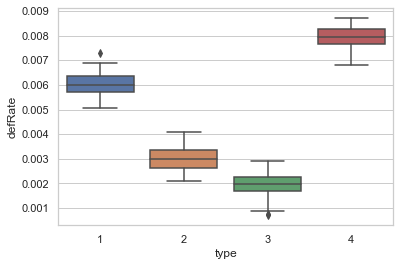

In [109]:
sns.boxplot(x=df1.type, y=df1.defRate, data=df1)

<AxesSubplot:xlabel='type', ylabel='defRate'>

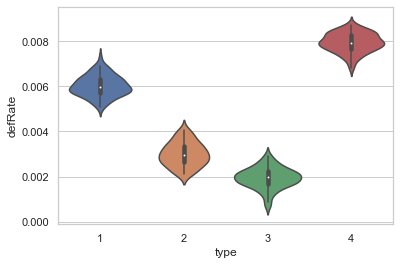

In [110]:
sns.violinplot(x=df1.type,y=df1.defRate)

# boxplot과 violinplot을 확인한 결과 type간 유의미한 차이가 있을 것 같은 형상을 보이고 있다. 히스토그램으로 살펴보자

[Text(0, 0.5, 'defRate'), Text(0.5, 1.0, 'type4')]

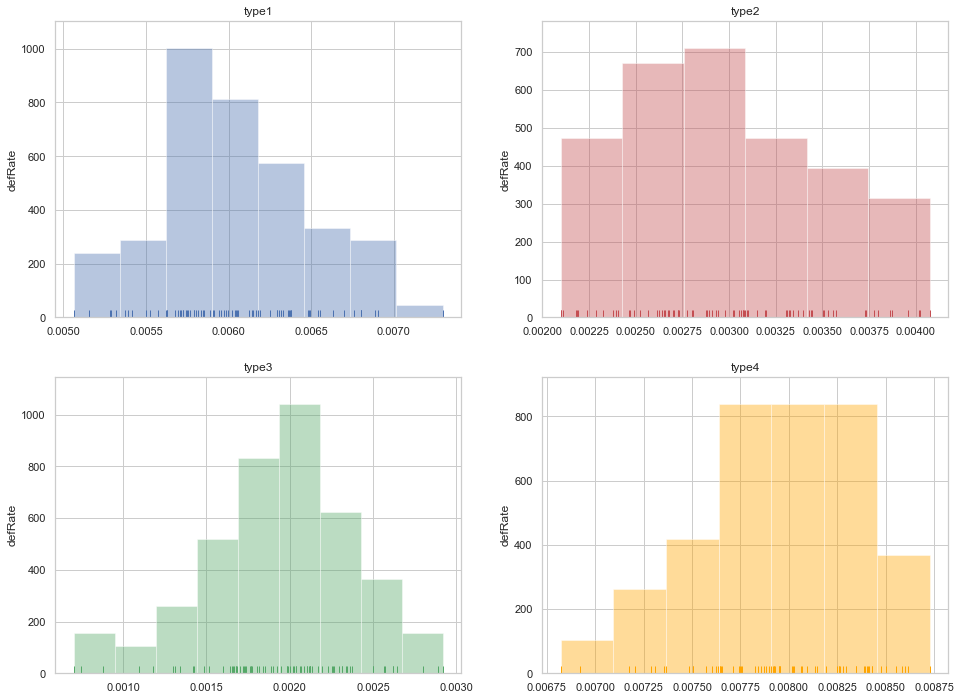

In [111]:
type1=np.array(df1[df1.type==1]['defRate'])
type2=np.array(df1[df1.type==2]['defRate'])
type3=np.array(df1[df1.type==3]['defRate'])
type4=np.array(df1[df1.type==4]['defRate'])

figure, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2) # figure와 2X2 axes 생성
figure.set_size_inches(16,12)                     # 피규어 크기 설정

sns.distplot(type1, norm_hist=True, kde=False, label='type1',rug=True, color='b',ax=ax1)    # norm_hist는 뭔지 모르겠음
sns.distplot(type2, norm_hist=True, kde=False, label='type2',rug=True, color='r',ax=ax2)
sns.distplot(type3, norm_hist=True, kde=False, label='type3',rug=True, color='g',ax=ax3)
sns.distplot(type4, norm_hist=True, kde=False, label='type4',rug=True, color='orange',ax=ax4)

ax1.set(ylabel='defRate', title='type1')
ax2.set(ylabel='defRate', title='type2')
ax3.set(ylabel='defRate', title='type3')
ax4.set(ylabel='defRate', title='type4')

In [112]:
# 표 한번에 보기



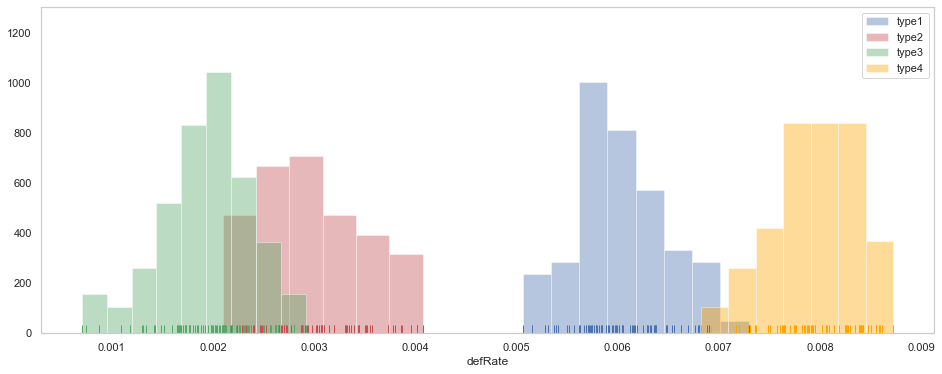

In [113]:
plt.figure(figsize=(16,6))

sns.distplot(type1, norm_hist=True, kde=False, label='type1',rug=True, color='b')    
sns.distplot(type2, norm_hist=True, kde=False, label='type2',rug=True, color='r')
sns.distplot(type3, norm_hist=True, kde=False, label='type3',rug=True, color='g')
sns.distplot(type4, norm_hist=True, kde=False, label='type4',rug=True, color='orange')
plt.xlabel('defRate')
plt.legend()
plt.grid(False)


* 지금까지 데이터 검토 및 기초통계량을 확인했다.
* 이제 일원 분산 분석을 시행한다.

* statsmodels 패키지의 ols 클래스를 사용하여 보기 쉽게 만들어보자
    - ols(formula = '종속변수 ~ C(독립변수), data=  ).fit()    # .fit()는 학습하는 것을 의미한다.
    - 결과의 반환은 데이터.summary()
    
* 표의 해석
    - No.Observations : 표본 수
    - Df Residuals : 잔차 (n-1)
    - Df Model : 독립변수의 수
    - Covariance Type : 공분산 타입
    - R-squared : 결정계수. 모델의 설명력을 의미 (0.4 이상이면 괜찮은 모델이라 봄)
    - adj. R-squared : 수정된 결정계수, 독립변수가 여러 개인 다중회귀분석에서 사용
    - F-statistic : 검정통계량 F값
    - prob(F-statistic) : F 검정통계량으로 산출한 p-value

In [145]:
df1_ols=pd.DataFrame(df1,columns=['defRate','type'])
results=ols('defRate~C(type)',data=df1_ols).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                defRate   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     2583.
Date:                Sat, 30 Oct 2021   Prob (F-statistic):          7.22e-212
Time:                        03:08:49   Log-Likelihood:                 1877.6
No. Observations:                 300   AIC:                            -3747.
Df Residuals:                     296   BIC:                            -3732.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0060   5.38e-05    112.003      0.000       0.006       0.006
C(type)[T.2]    -0.0030   7.56e-05    -40.105      0.000      -0.003      -0.003
C(type)[T.3]    -0.0041   7.54e-05    -54.161      0.000      -0.004      -0.004
C(type)[T.4]     0.0019   7.75e-05     24.745      0.000       0.002       0.002
==============================================================================
Omnibus:                        0.584   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.747   Jarque-Bera (JB):                0.693
Skew:                          -0.014   Prob(JB):                        0.707
Kurtosis:                       2.766   Cond. No.                         4.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [149]:
# p-valus 값을 위한 간단한 통계
# statsmodels.api의 anova_lm 이용

df1_anova_table=sm.stats.anova_lm(results,type=2) # statsmodels.api => sm
df1_anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(type),3.0,0.001684,5.613998e-04,2583.218337,7.222459e-212
Residual,296.0,0.000064,2.173257e-07,NaN,NaN


* 분산분석 결과 통계적으로 유의함을 알 수 있었다.
* 이제 분산 분석의 전제조건인 등분산성과 정규성을 충족하는지 확인해보자

In [137]:
# 등분산성 검정

type1=df1[df1.type==1]['defRate']
type2=df1[df1.type==2]['defRate']
type3=df1[df1.type==3]['defRate']
type4=df1[df1.type==4]['defRate']

levene_1=stats.levene(type1,type2,type3,type4)               # 등분산성 검정
levene_2=stats.levene(type1,type2,type3,type4,center='mean') # 평균으로 비교
fligner=stats.fligner(type1,type2,type3,type4)
bartlett=stats.bartlett(type1,type2,type3,type4)

print(levene)
print(levene1)
print(fligner)
print(bartlett)

# 검정 결과 모든 값에서 p-value가 유의수준 0.05보다 크므로 귀무가설을 채택한다
# 즉, 등분산성이 충족된다.

LeveneResult(statistic=1.7310879971416546, pvalue=0.16066186266506843)
LeveneResult(statistic=1.7486552440177128, pvalue=0.1571322706629753)
FlignerResult(statistic=5.074469579473792, pvalue=0.16642463017397863)
BartlettResult(statistic=3.6075064508532617, pvalue=0.30708422680820513)


* 사후검정(다중비교)을 통해 유사성이 존재하는 그룹을 찾아낸다
* tukey 방법론 활용
* statsmodels.stats.multicomp 패키지의 pairwise_tukeyhsd 활용
   - pairwise_tukeyhsd(종속변수,독립변수,alpha(유의확률)= )
   - 결과변수.summary() 활용



In [153]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

df1_tukey=pairwise_tukeyhsd(df1.defRate,df1.type,alpha=0.05)
df1_tukey.summary()

# 결과값을 해석하자면 각 그룹에 대한 p-value는 유의수준 보다 낮다. 즉, 각 그룹은 모두 유의성이 존재하지 않는다. 
# 다시말해 각 그룹의 평균 차이는 유의미하다.
# 이때 앞서 살펴본 type3의 불량률이 가장 낮았는데 각 그룹 간 통계적으로 유의하기 때문에 이를 사실로 받아들일 수 있다.

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,-0.003,0.001,-0.0032,-0.0028,True
1,3,-0.0041,0.001,-0.0043,-0.0039,True
1,4,0.0019,0.001,0.0017,0.0021,True
2,3,-0.0011,0.001,-0.0012,-0.0009,True
2,4,0.005,0.001,0.0048,0.0051,True
3,4,0.006,0.001,0.0058,0.0062,True
